# 시나리오
- 생존자 분류
- 성별, pclass, 연령으로 사망자와 생존자를를 분류
- 결정트리를 적용하여 분류 진행

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
train = sns.load_dataset("titanic")
train.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 데이터 전처리1
- 원핫인코딩
- null값 제거

In [66]:
# 'sex' 컬럼을 숫자로 변환 (남자: 0, 여자: 1) 
# 'pclass' 별 생존률 수치로 전처리 필요

In [67]:
# Sex (1: female, 0: male)
train["sex"] == "male"

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [68]:
train.loc[train["sex"] == "male", "sex_encode"] = 0
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


In [69]:
train.loc[train["sex"] == "female", "sex_encode"] = 1
train.head()
# sex_encode에 성별 정보값을 int으로 변경 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


In [71]:
# 각 clss 별 생존률 수치 확인
pd.pivot_table(data=train, index="pclass", values="survived")

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [72]:
train.loc[ train["pclass"] == 1 , "pclass(status)" ] = 0.675159
train.loc[ train["pclass"] == 2 , "pclass(status)" ] = 0.800000
train.loc[ train["pclass"] == 3 , "pclass(status)" ] = 0.500000

In [73]:
# pclass 에 각 생존률 대치
pd.pivot_table(data=train, index="pclass(status)", values="survived")

,survived
pclass(status),
0.500000,0.242363
0.675159,0.629630
0.800000,0.472826


In [75]:
train # 전체 데이터값 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encode,pclass(status)
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,0.500000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.675159
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,0.500000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,0.675159
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.0,0.800000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.0,0.675159
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1.0,0.500000
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.0,0.675159


In [13]:
train.dropna() # null 제거

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encode,pclass(status)
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.675159
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,0.675159
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0.0,0.675159
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1.0,0.500000
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1.0,0.675159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,1.0,0.675159
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,0.0,0.675159
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.675159
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.0,0.675159


##### class
- sex 에서 0이면 남자 1이면 여자
- survived에서 0이면 사망 1이면 생존

#### 정보 확인

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   survived        891 non-null    int64   
 1   pclass          891 non-null    int64   
 2   sex             891 non-null    object  
 3   age             714 non-null    float64 
 4   sibsp           891 non-null    int64   
 5   parch           891 non-null    int64   
 6   fare            891 non-null    float64 
 7   embarked        889 non-null    object  
 8   class           891 non-null    category
 9   who             891 non-null    object  
 10  adult_male      891 non-null    bool    
 11  deck            203 non-null    category
 12  embark_town     889 non-null    object  
 13  alive           891 non-null    object  
 14  alone           891 non-null    bool    
 15  sex_encode      891 non-null    float64 
 16  pclass(status)  891 non-null    float64 
dtypes: bool(2), cate

In [77]:
train = train.dropna()

#### 기술통계 정보 확인

In [78]:
train.describe()

,survived,pclass,age,sibsp,parch,fare,sex_encode,pclass(status)
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735,0.483516,0.675824
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774,0.501107,0.054646
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.675159
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000,0.675159
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000,1.000000,0.675159
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,0.800000


#### 데이터 나누기

In [79]:
X = train[['pclass(status)', 'sex_encode', 'age']]
y = train['survived']

In [80]:
from sklearn.model_selection import train_test_split

# train_input, test_input, train_target, test_target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # 8 : 2

In [81]:
X_train.shape, X_test.shape

((145, 3), (37, 3))

In [82]:
X_train_cleaned = X_train.dropna() # NaN값 제거

In [83]:
X_test_cleaned = X_test.dropna() # NaN값 제거

In [84]:
y_train.count()

145

In [85]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_cleaned)

X_train_scaled = ss.transform(X_train_cleaned)
X_test_scaled = ss.transform(X_test_cleaned)

In [86]:
# 스케일링한 X_훈련데이터
X_train_scaled

array([[-0.00558145, -1.02090818,  0.66815646],
       [-0.00558145, -1.02090818, -0.42825255],
       [ 2.16712258, -1.02090818, -2.15592735],
       [-3.05400837, -1.02090818, -0.69404867],
       [-0.00558145, -1.02090818,  0.1033397 ],
       [-0.00558145, -1.02090818,  1.69811644],
       [ 2.16712258,  0.97952001, -0.82694673],
       [-0.00558145,  0.97952001,  1.16652419],
       [-0.00558145, -1.02090818,  1.89746353],
       [-0.00558145,  0.97952001,  0.23623776],
       [-0.00558145, -1.02090818,  0.16978873],
       [-0.00558145, -1.02090818,  0.03689067],
       [-0.00558145, -1.02090818, -0.56115061],
       [-0.00558145, -1.02090818, -0.69404867],
       [ 2.16712258,  0.97952001,  1.43232032],
       [-0.00558145, -1.02090818,  1.23297323],
       [-0.00558145,  0.97952001, -0.89339576],
       [-0.00558145, -1.02090818,  0.30268679],
       [-0.00558145,  0.97952001,  0.50203389],
       [-0.00558145, -1.02090818,  0.03689067],
       [-0.00558145,  0.97952001,  0.036

In [45]:
X_test_scaled

array([[-0.00558145, -1.02090818, -0.7604977 ],
       [-3.05400837,  0.97952001, -0.42825255],
       [-0.00558145,  0.97952001, -0.95984479],
       [-0.00558145,  0.97952001,  1.23297323],
       [-0.00558145, -1.02090818,  0.83427904],
       [-0.00558145, -1.02090818,  2.36260675],
       [-0.00558145, -1.02090818, -0.7604977 ],
       [-0.00558145,  0.97952001,  0.36913582],
       [-0.00558145, -1.02090818,  0.03689067],
       [-0.00558145, -1.02090818,  1.49876935],
       [-0.00558145,  0.97952001, -0.02955836],
       [-0.00558145,  0.97952001,  1.03362613],
       [ 2.16712258, -1.02090818, -2.22237638],
       [-0.00558145, -1.02090818, -1.22564092],
       [-0.00558145, -1.02090818,  1.10007516],
       [-0.00558145, -1.02090818, -0.82694673],
       [-0.00558145,  0.97952001, -1.09274286],
       [-0.00558145,  0.97952001, -0.95984479],
       [-0.00558145, -1.02090818,  1.29942226],
       [-0.00558145,  0.97952001, -1.22564092],
       [-0.00558145, -1.02090818,  1.033

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7862068965517242
0.7297297297297297


In [90]:
# 선형 회귀(Linear Regression) 모델의 계수(coefficient)와 절편(intercept)을 출력
print(lr.coef_, lr.intercept_)
# lr.coef_는 모델의 계수, lr.intercept_는 절편

[[ 0.13764689  1.46266486 -0.22821008]] [1.21977374]


In [89]:
sum(dt.feature_importances_) # 특성 중요도를 모두 더하면 1인것 확인.

1.0

## 결정트리(Decision Tree)

In [49]:
from sklearn.tree import DecisionTreeClassifier # 결정트리 알고리즘 분류기 실행

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train) 

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.9448275862068966
0.7297297297297297


##### 결과
- 훈련 세트에 대한 점수가 매우 높음
- 테스트 세트에 대한 점수는 다소 낮음

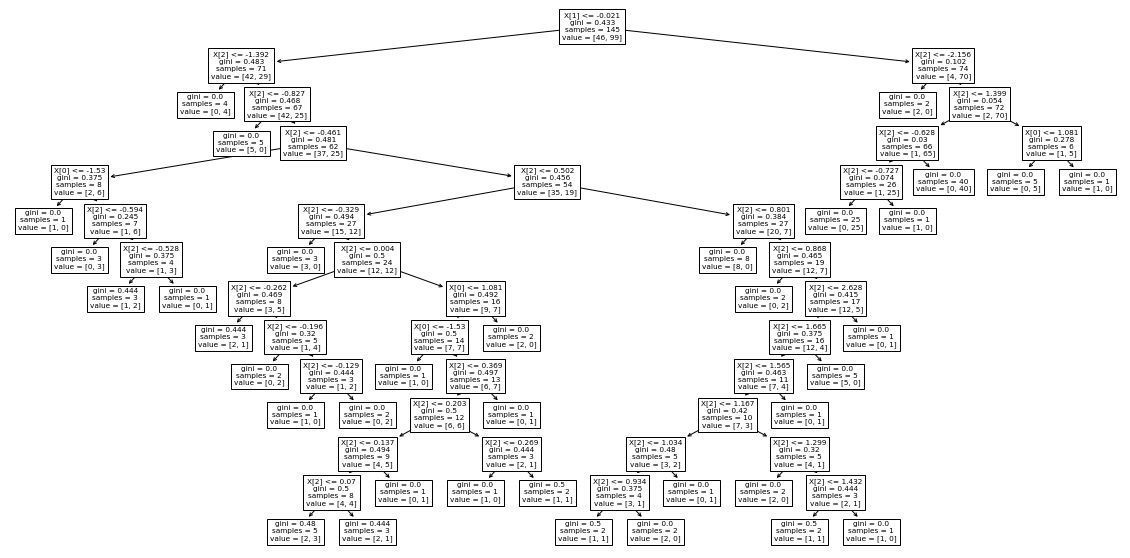

In [50]:
# plot_tree() 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42) # 깊이 제한 3까지
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))
print(dt.score(X_test_scaled, y_test))

0.8137931034482758
0.7027027027027027


In [30]:
X.columns

Index(['pclass(status)', 'sex_encode', 'age'], dtype='object')

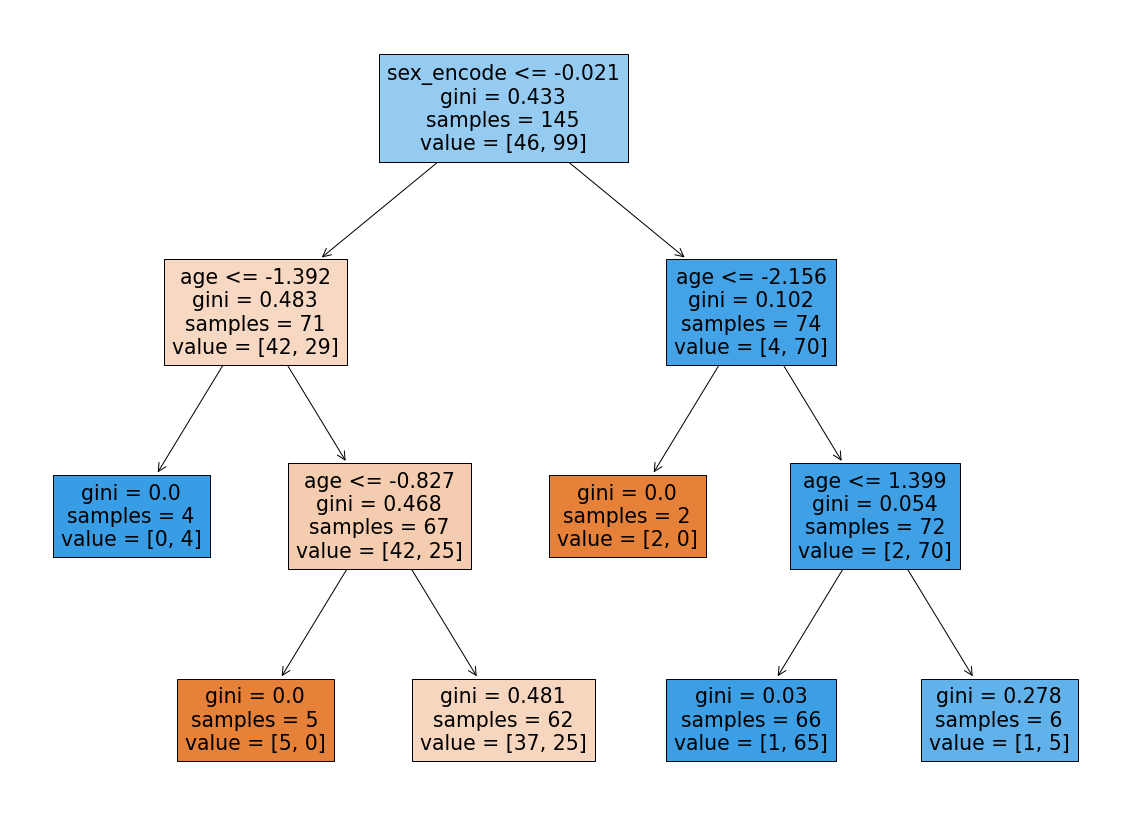

In [31]:
# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['pclass(status)', 'sex_encode', 'age'])
plt.show()

##### 해석
- 깊이 1의 노드는 모두 sugar를 기준으로 훈련 세트를 나눔
- 깊이 2의 노드는 맨 왼쪽의 노드는 sugar로 나누고   
    두 번째 노드는 alcohol을 기준으로 나눔
    나머지는 pH로 나눔
- 깊이 3에 있는 노드는 최종 노드(leaf)
- 세 번째 노드만 음성 클래스가 많음(이 노드에 맞으면 레드와인으로 예측)
    - 이 노드에서 레드와인으로 분류된다는 것은  
        1) -0.802 <= 당도 <= -0.239  
        2) 알콜도수 <= 0.454  
        - 1) 조건과 2)조건에 만족하면 레드와인
        

In [32]:
# 특성 중요도 확인 ['pclass(Status)', 'sex_encode', 'age'] pclass는 판별에 부적합..
dt.feature_importances_ 

array([0.        , 0.71360872, 0.28639128])


- 결정트리에서 스케일링은 결과에 영향을 주지 않으므로 표준화 전처리가 반드시 필요하지 않음

0.8137931034482758
0.7027027027027027
['pclass(status)' 'sex_encode' 'age']
[0.         0.71360872 0.28639128]


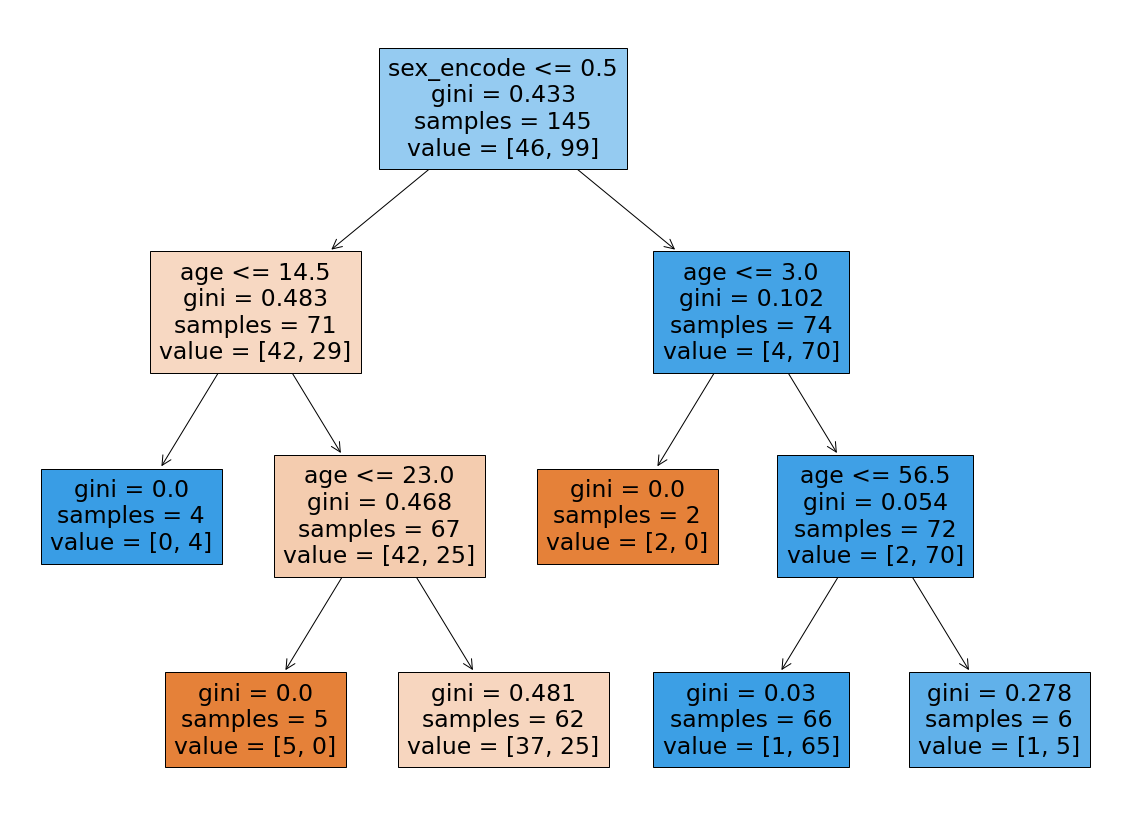

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print(dt.feature_names_in_)
print(dt.feature_importances_)

# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['pclass(status)', 'sex_encode', 'age'])
plt.show()

In [34]:
sum(dt.feature_importances_) # 특성 중요도를 모두 더하면 1

1.0

0.9379310344827586
0.7297297297297297


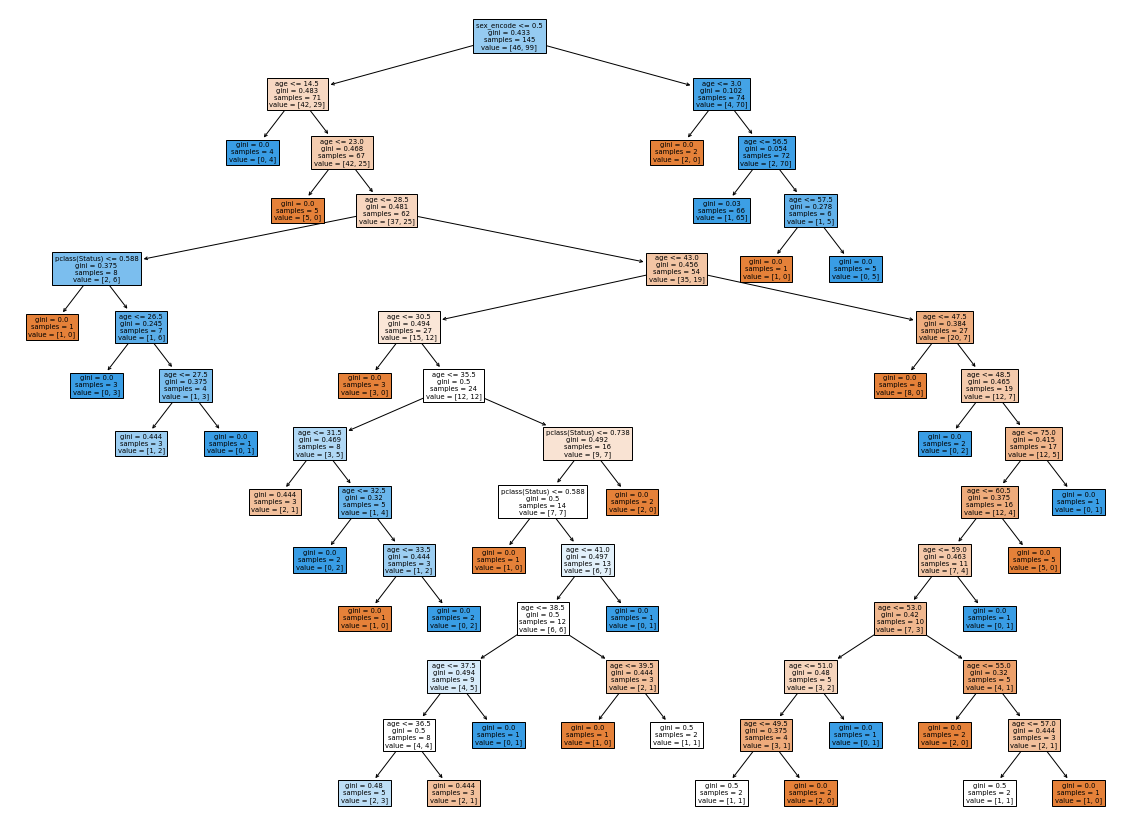

In [91]:
from sklearn.tree import DecisionTreeClassifier
# gini 지수의 최솟값을 0.0005로 설정(최소 불손도 지정)
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42) 
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['pclass(Status)', 'sex_encode', 'age'])
plt.show()


# 교차검증(Cross Validation)

### K-Fold Cross Validation

### 데이터 준비 다시

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = train[['pclass(status)', 'sex_encode', 'age']]
target = train['survived']

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [56]:
# 한번 더 분할 왜? 검증하기 위해서
X_train_sub, X_test_valid, y_train_sub, y_test_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [57]:
X_train_sub.shape, X_test_valid.shape

((116, 3), (29, 3))

In [60]:
X_test_valid.shape, y_test_valid.shape # 검증데이터

((29, 3), (29,))

In [61]:
# 교차검증
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
scores # 훈련데이터를 5개로 나눠서 5번 훈련하고 5번 검증해서 나온 점수

{'fit_time': array([0.0029912 , 0.00199342, 0.00199461, 0.00196528, 0.00199509]),
 'score_time': array([0.00099802, 0.00099826, 0.00102639, 0.00199485, 0.00102305]),
 'test_score': array([0.79310345, 0.75862069, 0.82758621, 0.72413793, 0.82758621])}

In [62]:
import numpy as np

np.mean(scores['test_score'])

0.7862068965517242